In [4]:
import pandas as pd

In [5]:
url = "https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv"

In [6]:
sales_data=pd.read_csv(url)

In [7]:
print(sales_data.head())

   Opportunity Number     Supplies Subgroup          Supplies Group  \
0             1641984  Exterior Accessories         Car Accessories   
1             1658010  Exterior Accessories         Car Accessories   
2             1674737      Motorcycle Parts  Performance & Non-auto   
3             1675224         Shelters & RV  Performance & Non-auto   
4             1689785  Exterior Accessories         Car Accessories   

      Region Route To Market  Elapsed Days In Sales Stage Opportunity Result  \
0  Northwest    Fields Sales                           76                Won   
1    Pacific        Reseller                           63               Loss   
2    Pacific        Reseller                           24                Won   
3    Midwest        Reseller                           16               Loss   
4    Pacific        Reseller                           69               Loss   

   Sales Stage Change Count  Total Days Identified Through Closing  \
0                     

In [8]:
print(sales_data.describe())

       Opportunity Number  Elapsed Days In Sales Stage  \
count        7.802500e+04                 78025.000000   
mean         7.653429e+06                    43.595348   
std          1.054848e+06                    26.585600   
min          1.641984e+06                     0.000000   
25%          6.900423e+06                    19.000000   
50%          7.545569e+06                    43.000000   
75%          8.228329e+06                    65.000000   
max          1.009427e+07                   210.000000   

       Sales Stage Change Count  Total Days Identified Through Closing  \
count              78025.000000                           78025.000000   
mean                   2.955732                              16.728356   
std                    1.497242                              16.729593   
min                    1.000000                               0.000000   
25%                    2.000000                               4.000000   
50%                    3.000000  

In [9]:
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

In [10]:
sales_data.shape

(78025, 19)

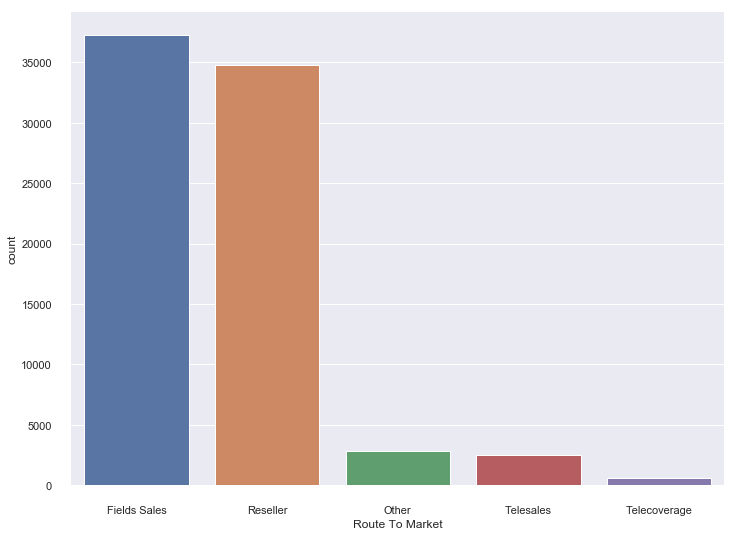

In [15]:
#importing seaborn module
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
sns.set(style="whitegrid",color_codes=True)
#setting the plot size
sns.set(rc={'figure.figsize':(11.7,8.7)})
sns.countplot('Route To Market',data=sales_data)
#remove the top and dowm margin
sns.despine(offset=10,trim=True)
plt.show()

In [16]:
from sklearn import preprocessing

In [17]:
le=preprocessing.LabelEncoder()
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])
#display the initial records
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [19]:
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]
data = sales_data[cols]
#assigning the Oppurtunity Result column as target
target = sales_data['Opportunity Result']
data.head(n=2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1


In [20]:
from sklearn.model_selection import train_test_split

In [22]:
data_train,data_test,target_train,target_test=train_test_split(data,target,test_size=0.30,random_state=10)

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
from sklearn.metrics import accuracy_score

In [26]:
gnb=GaussianNB()
#train the algo and predict onn test data
pred=gnb.fit(data_train,target_train).predict(data_test)
#print (pred.tolist())
print("Naive Bayes accuracy:",accuracy_score(target_test,pred,normalize=True))

Naive Bayes accuracy: 0.7590567327409433


In [27]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.777811004784689


C:\Users\Dibs Gautam\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8145505809979494
